In [1]:
import pandas as pd
import seaborn as sns
from sklearnex import svm
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearnex.model_selection import train_test_split

In [16]:
loan_data = pd.read_csv('loan_status_svm_dataset.csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
loan_data.shape

(614, 13)

In [18]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Checking for null values

In [19]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
loan_data = loan_data.dropna()
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
loan_data.shape

(480, 13)

#### Encoding outcome variable.

In [22]:
le = preprocessing.LabelEncoder()

In [23]:
loan_data['Loan_Status'] = le.fit_transform(loan_data['Loan_Status'])
loan_data['Loan_Status']

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [24]:
'''
Alterante way to do the above:
loan_data.replace({'Loan_Status':{'Y': 1, 'N': 0}, inplace = True)
'''

"\nAlterante way to do the above:\nloan_data.replace({'Loan_Status':{'Y': 1, 'N': 0}, inplace = True)\n"

In [25]:
loan_data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [26]:
loan_data.replace({"Dependents": {"3+": 4}}, inplace = True)

In [27]:
'''
loan_data = loan_data.replace(to_replace = "3+", value = 4)
'''

'\nloan_data = loan_data.replace(to_replace = "3+", value = 4)\n'

In [28]:
loan_data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

#### Encoding some input features.

In [29]:
loan_data['Married'] = le.fit_transform(loan_data['Married'])
loan_data['Self_Employed'] = le.fit_transform(loan_data['Self_Employed'])
loan_data['Property_Area'] = le.fit_transform(loan_data['Property_Area'])
loan_data['Education'] = le.fit_transform(loan_data['Education'])
loan_data['Gender'] = le.fit_transform(loan_data['Gender'])

In [30]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [31]:
loan_data.replace({"Education": {1:0, 0:1}}, inplace = True)
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


### Checking loan approval trends.

<AxesSubplot: xlabel='count', ylabel='Education'>

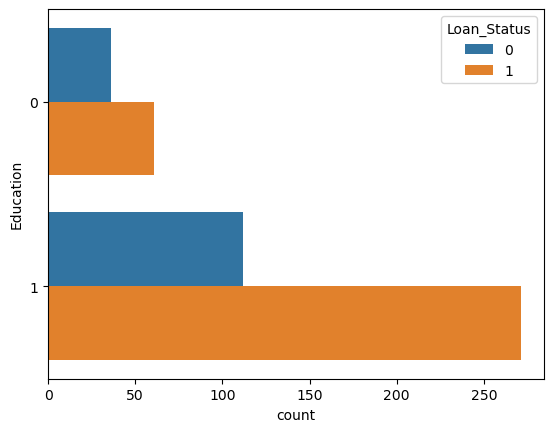

In [32]:
sns.countplot(y = 'Education', data = loan_data, hue = 'Loan_Status')

##### Graduated applicants have an overall higher chance of getting loans compared to non-graduates.

<AxesSubplot: xlabel='count', ylabel='Married'>

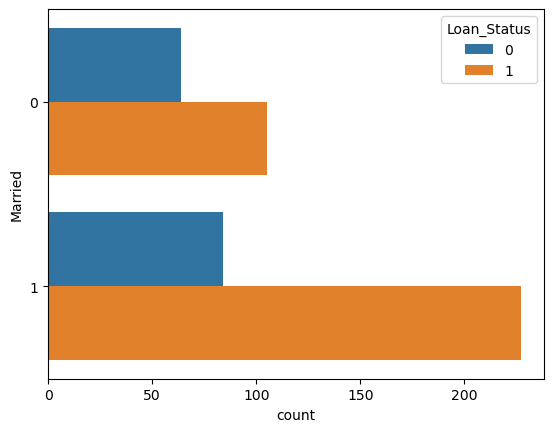

In [33]:
sns.countplot(y = 'Married', hue = 'Loan_Status', data = loan_data)

##### Similar to graduated people, married people have a higher loan approval rate.

<AxesSubplot: xlabel='count', ylabel='Dependents'>

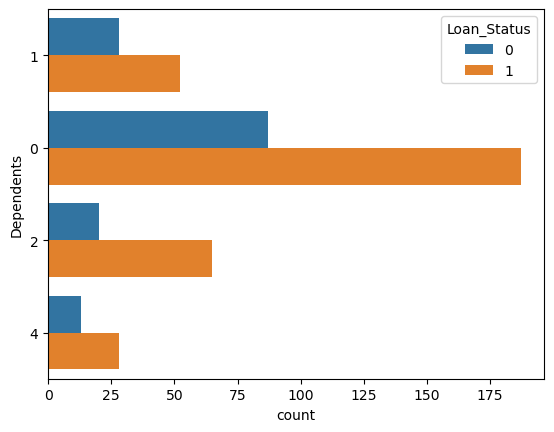

In [34]:
sns.countplot(hue = 'Loan_Status', y = 'Dependents', data = loan_data)

##### Applicants with 0 dependents have the highest chances of loan approval.

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Splitting the dataset.

In [35]:
x = loan_data.drop(columns = ['Loan_ID', 'Loan_Status'], axis = 1)
y = loan_data['Loan_Status']

In [36]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2


In [37]:
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 99, stratify = y)

In [39]:
print(x.shape, xtrain.shape, xtest.shape)

(480, 11) (384, 11) (96, 11)


In [40]:
print(y.shape, ytrain.shape, ytest.shape)

(480,) (384,) (96,)


#### Initializing SVM

In [41]:
svm_classifier = svm.SVC(kernel = 'linear')

In [42]:
svm_classifier.fit(xtrain, ytrain)

SVC(kernel='linear')

In [43]:
xtrain_pred = svm_classifier.predict(xtrain)
train_accuracy = accuracy_score(xtrain_pred, ytrain)

In [44]:
print(f"Accuracy of SVM classifier on training data is: {round(train_accuracy, 4) *100}%")

Accuracy of SVM classifier on training data is: 80.47%


In [45]:
xtest_pred = svm_classifier.predict(xtest)
test_accuracy = accuracy_score(xtest_pred, ytest)

In [58]:
print(f"Accuracy of SVM classifier on testing data is: {round(test_accuracy, 5) *100}%")

Accuracy of SVM classifier on testing data is: 80.208%


In [48]:
rbf_svm = svm.SVC(kernel = 'rbf', gamma = 'auto')

In [49]:
rbf_svm.fit(xtrain, ytrain)

SVC(gamma='auto')

In [50]:
xtrain_pred = svm_classifier.predict(xtrain)
train_accuracy = accuracy_score(xtrain_pred, ytrain)

In [51]:
print(f"Accuracy of SVM classifier on training data is: {round(train_accuracy, 4) *100}%")

Accuracy of SVM classifier on training data is: 80.47%


In [52]:
xtest_pred = svm_classifier.predict(xtest)
test_accuracy = accuracy_score(xtest_pred, ytest)

In [57]:
print(f"Accuracy of SVM classifier on testing data is: {round(test_accuracy, 5) *100}%")

Accuracy of SVM classifier on testing data is: 80.208%
